# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
from coinmarketcap_draw import coinmarketcap_data

Go ahead and create a `Share` object as follows:

In [3]:
coin_name = 'raiden-network-token'
data = coinmarketcap_data(coin_name)

In [4]:
share = bb.Share("123",'123',data=data)

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [5]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
time,,,,,,
2017-12-03 19:34:40,184882577.0,0.000314,3.68667,13848000.0,3.756235e+06,3.68667
2017-12-03 19:49:43,185846941.0,0.000316,3.70590,13787100.0,3.720311e+06,3.70590
2017-12-03 20:04:42,189084055.0,0.000322,3.77045,14049900.0,3.726319e+06,3.77045
2017-12-03 20:19:44,188830302.0,0.000319,3.76539,14220300.0,3.776581e+06,3.76539
2017-12-03 20:34:42,185604722.0,0.000314,3.70107,14016700.0,3.787202e+06,3.70107


In order to analyse a given attribute, you could plot the same as follows:

In [6]:
figsize = (20, 15)

% matplotlib inline

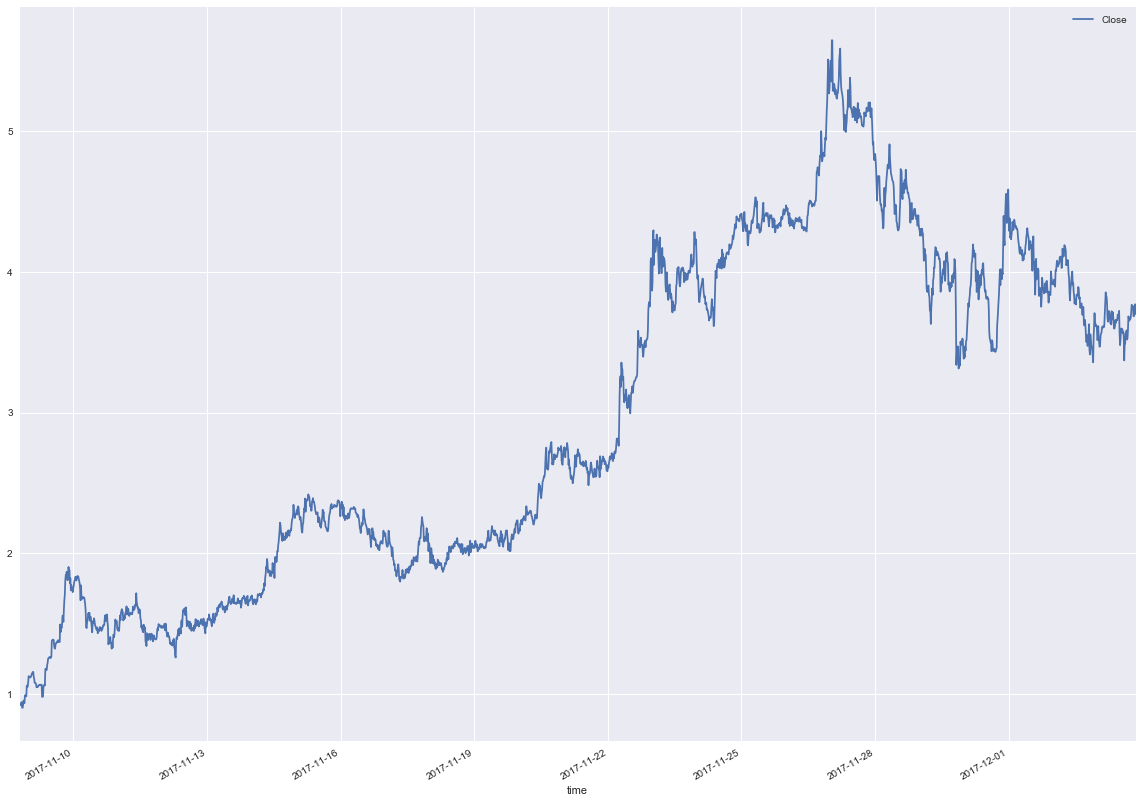

In [7]:
share.plot(figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

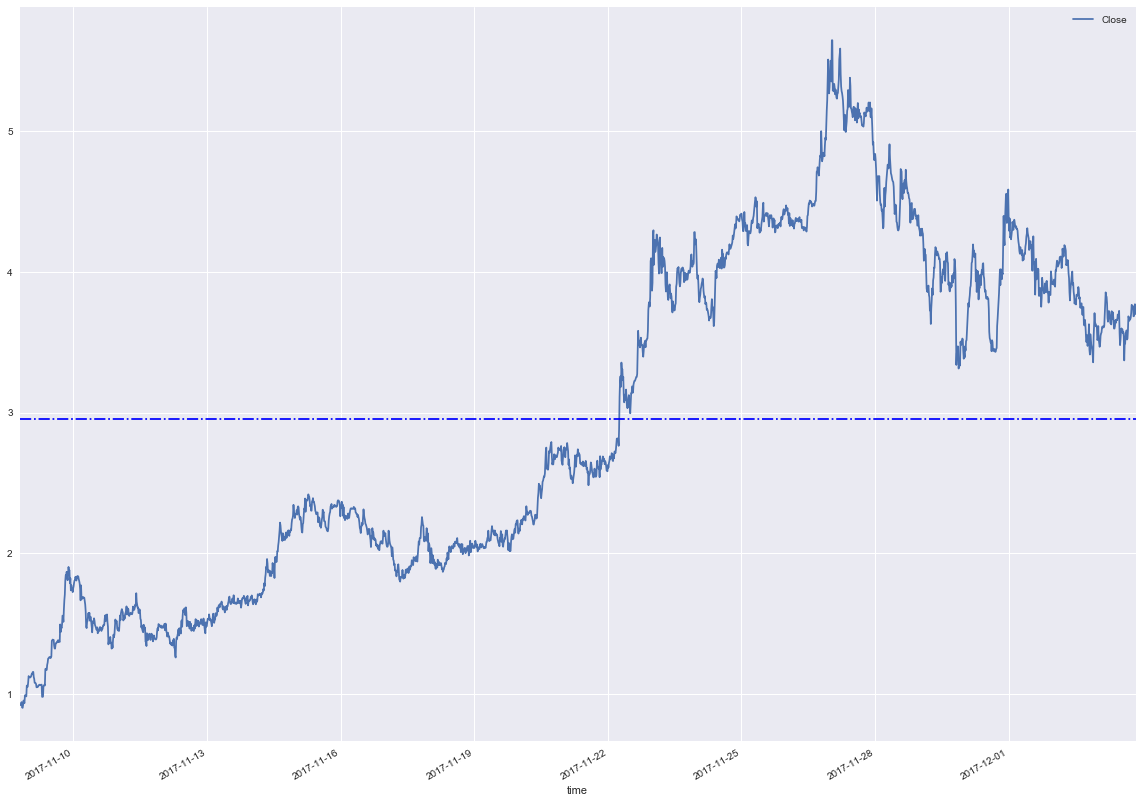

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
time,,,
2017-12-03 19:34:40,3.460644,3.626601,3.792557
2017-12-03 19:49:43,3.460715,3.628181,3.795647
2017-12-03 20:04:42,3.458900,3.629175,3.799451
2017-12-03 20:19:44,3.456854,3.631128,3.805402
2017-12-03 20:34:42,3.457073,3.630855,3.804637


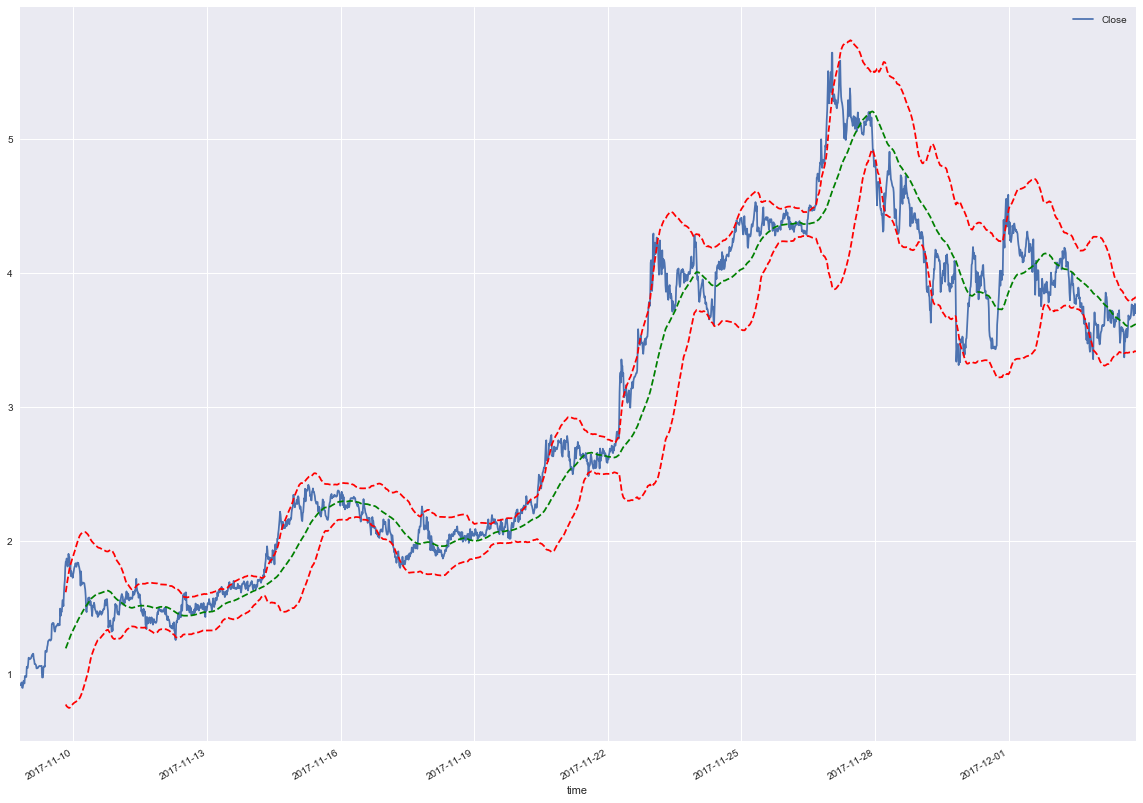

In [10]:
share.plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [38]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True, train=0.1)

In [39]:
import numpy as np
Xtrain  = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

### Modelling

In [40]:
from bulbea.learn.models import RNN

In [41]:
rnn = RNN([1, 100, 100, 1]) # number of neurons in each layer

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=100)`
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  self.model.add(core.Dense(output_dim = sizes[-1]))


#### TRAINING

In [42]:
rnn.fit(Xtrain, ytrain)

Epoch 1/10
238/238 [==============================] - 2s - loss: 0.0093      
Epoch 2/10
238/238 [==============================] - 1s - loss: 0.0047     

#### TESTING

In [43]:
predicted = rnn.predict(Xtest)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
sqr_err = mean_squared_error(ytest, predicted)
print(sqr_err)

0.00078428702573


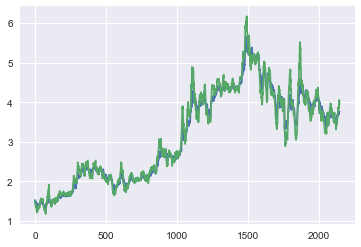

In [47]:
import matplotlib.pyplot as pplt
from bulbea.entity.share import _reverse_cummulative_return

_,_,_,ori_ytest = split(share, 'Close', normalize = False, train=0.1)

new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()

In [48]:
data.tail(5)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
time,,,,,,
2017-12-03 19:34:40,184882577.0,0.000314,3.68667,13848000.0,3.756235e+06,3.68667
2017-12-03 19:49:43,185846941.0,0.000316,3.70590,13787100.0,3.720311e+06,3.70590
2017-12-03 20:04:42,189084055.0,0.000322,3.77045,14049900.0,3.726319e+06,3.77045
2017-12-03 20:19:44,188830302.0,0.000319,3.76539,14220300.0,3.776581e+06,3.76539
2017-12-03 20:34:42,185604722.0,0.000314,3.70107,14016700.0,3.787202e+06,3.70107


In [49]:
_, Xtest, _, ytest = split(share, 'Close', normalize = True, train = 0.0)
_,ori_Xtest,_,ori_ytest = split(share, 'Close', normalize = False, train = 0.0)
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [50]:
predicted = rnn.predict(Xtest)

In [51]:
mean_squared_error(ytest, predicted)

0.00099198916473776334

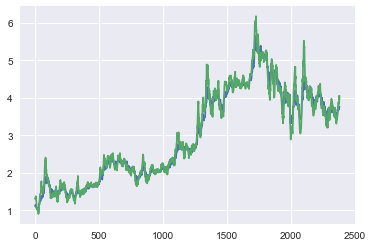

In [52]:
new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()

In [53]:
print(ori_Xtest[-1])

[ 3.48906  3.49017  3.5648   3.55789  3.58452  3.51947  3.52586  3.58413
  3.68447  3.67329  3.65259  3.66748  3.66397  3.67509  3.70798  3.76634
  3.76154  3.74186  3.75679  3.68462  3.68667  3.7059   3.77045]


In [54]:
from datetime import datetime
rnn.model.save("models/{}_{}_{}.h5".format(coin_name,sqr_err,datetime.utcnow().strftime('%Y_%b_%d_%H_%M')))